<a href="https://colab.research.google.com/github/Ruthiga-895/PRODIGY_DS_03/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn seaborn matplotlib

Dataset Shape: (4521, 17)
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
y
no     4000
yes     521
Name: count, dtype: int64

Confusion Matrix:
 [[1158   47]


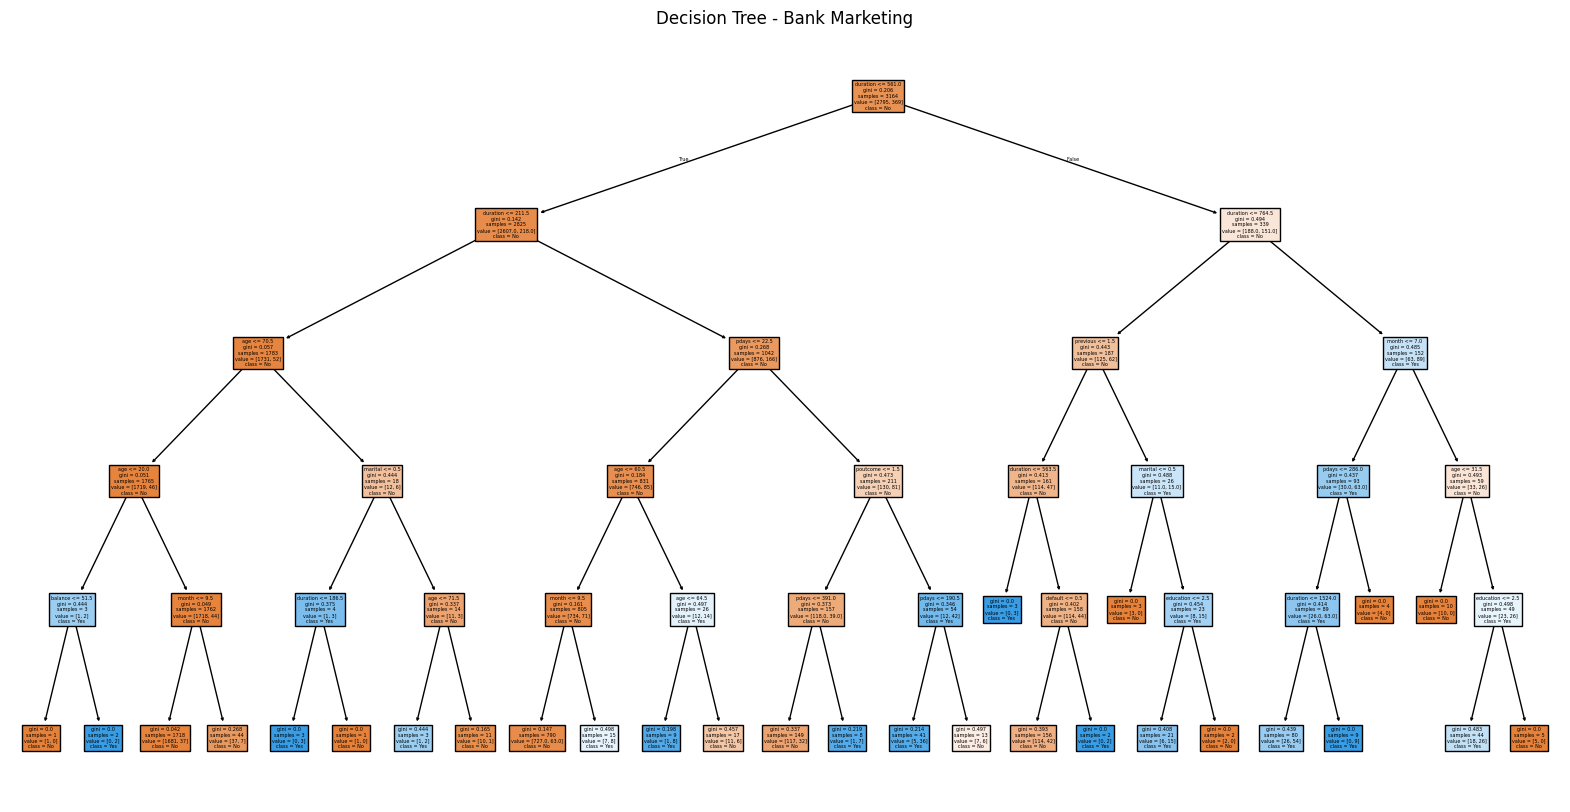

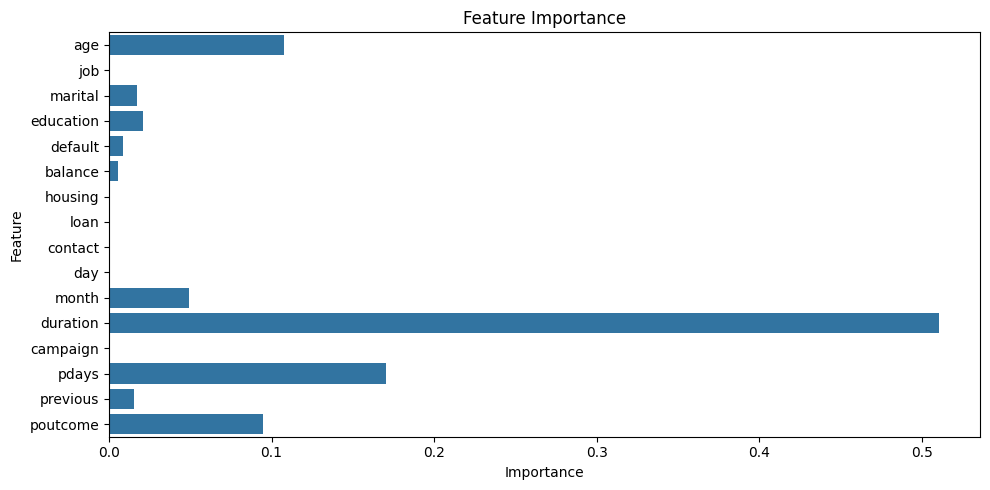

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/bank.csv', sep=';')  # update path if needed


# 1. BASIC INFO

print("Dataset Shape:", df.shape)
print(df.head())
print(df['y'].value_counts())  # Target column


# 2. PREPROCESSING

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('y', axis=1)
y = df['y']

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 3. MODEL TRAINING

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)


# 4. EVALUATION

y_pred = clf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


# 5. VISUALIZE DECISION TREE

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree - Bank Marketing')
plt.show()


# 6. FEATURE IMPORTANCE

plt.figure(figsize=(10, 5))
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
